In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# **Modelo de regresión Lasso**

---



In [2]:
X = pd.read_csv('x.csv')
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [0]:
Y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [6]:
print(len(X), len(x_train), len(x_test))

4104 2462 1642


In [10]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,760505847.0


In [0]:
model = Lasso()

In [13]:
model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
predicted = model.predict(x_test)

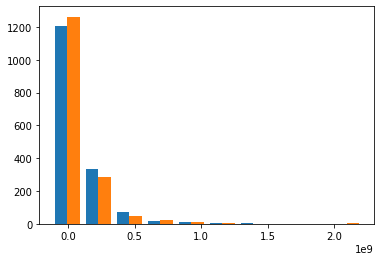

In [19]:
plt.hist([predicted, y_test]) # Primera evaluacion visual: parecida distribucion
plt.show()

# **Evaluación del modelo**

---



In [25]:
# Score con los datos de entrenamiento
model.score(x_train, y_train)

0.8585774030840992

In [27]:
# Score con los datos de prueba
model.score(x_test, y_test)

0.8443951321352473

Scores > 0.8~0.7 y parecidos los de test y train -> Buenas metricas

In [0]:
residuals = y_test - predicted

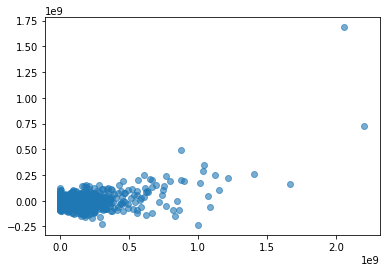

In [38]:
plt.scatter(y_test, residuals, alpha=0.6)
plt.show()

Cercanos al cero y ningun patron evidente -> buenos residuales absolutos

In [0]:
ap_residuals = np.abs(residuals) / y_test

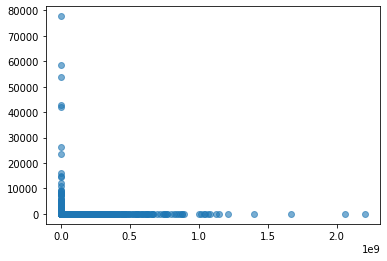

In [42]:
plt.scatter(y_test, ap_residuals, alpha=0.6)
plt.show()

No se aprecian los valores del eje x cercanos a 0 -> utilizare una escala logaritmica

In [0]:
lap_residuals = np.log(ap_residuals)

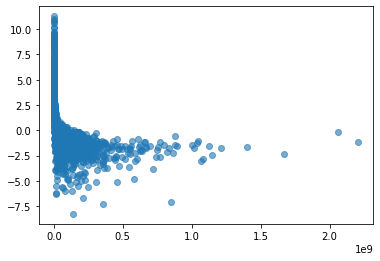

In [44]:
plt.scatter(y_test, lap_residuals, alpha=0.6)
plt.show()

Los valores son cercanos a 0 (solo se escapan algunas de bajo presupuesto que fueron subestimadas, pero para costos mas altos la grafica se acerca a 0) -> La segunda evaluacion (visual) es buena

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


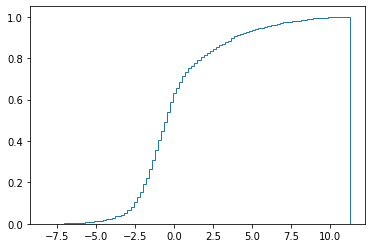

In [56]:
plt.hist(lap_residuals, bins=100, cumulative=True, normed=1, histtype='step');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

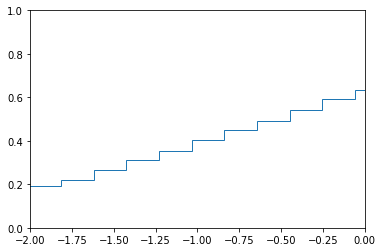

In [59]:
plt.hist(lap_residuals, bins=100, cumulative=True, normed=1, histtype='step')
plt.axis([-2, 0, 0, 1])
np.power(np.e * np.ones(5), np.linspace(-2, 0, 5))

Buen modelo aunque se puede mejorar porque solo cerca del 50% de los datos tienen un error menor a 1 (en la escala logaritmica)